# Chapter 6 - Decision Trees (Pohon Keputusan)

## Pengantar

Decision Trees (Pohon Keputusan) adalah salah satu algoritma Machine Learning yang paling serbaguna dan mudah dipahami. Seperti Support Vector Machines (SVM), Decision Trees dapat melakukan tugas klasifikasi, regresi, bahkan tugas multi-output. Algoritma ini sangat powerful dan mampu mempelajari dataset yang kompleks.

**Keunggulan Decision Trees:**
- Mudah dipahami dan diinterpretasi (white box model)
- Tidak memerlukan normalisasi atau scaling data
- Dapat menangani fitur numerik dan kategorikal
- Dapat menangani missing values
- Dapat melakukan feature selection secara otomatis

**Kelemahan Decision Trees:**
- Cenderung overfitting jika tidak diregularisasi
- Sensitif terhadap perubahan kecil pada data
- Bias terhadap fitur dengan banyak kategori
- Sulit menangkap hubungan linear

---

## 1. Melatih dan Memvisualisasikan Decision Tree

### Teori: Cara Kerja Decision Tree

Decision Tree bekerja dengan membuat pertanyaan binary (ya/tidak) pada setiap node untuk memisahkan data berdasarkan fitur tertentu. Proses ini disebut "splitting". Algoritma akan terus melakukan splitting hingga mencapai kondisi berhenti (misalnya kedalaman maksimum atau jumlah minimum sampel per node).

Setiap node internal berisi:
- **Pertanyaan/kondisi**: misalnya "petal length ≤ 2.45?"
- **Gini impurity**: mengukur seberapa "murni" node tersebut
- **Samples**: jumlah sampel yang mencapai node ini
- **Value**: distribusi kelas di node ini

### Implementasi Kode

In [3]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.tree import plot_tree
import graphviz

# Load dataset iris
iris = load_iris()
X = iris.data[:, 2:]  # Hanya menggunakan petal length dan width
y = iris.target

# Membuat dan melatih Decision Tree Classifier
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

print("Decision Tree berhasil dilatih!")
print(f"Fitur yang digunakan: {iris.feature_names[2:]}")
print(f"Kelas target: {iris.target_names}")

Decision Tree berhasil dilatih!
Fitur yang digunakan: ['petal length (cm)', 'petal width (cm)']
Kelas target: ['setosa' 'versicolor' 'virginica']


### Visualisasi Decision Tree

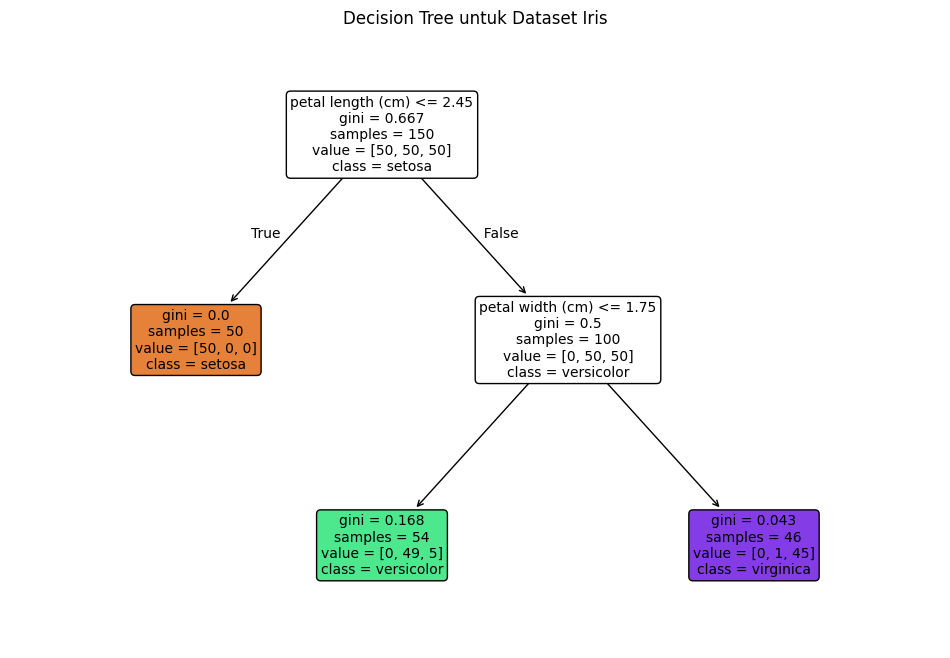

In [4]:
# Visualisasi menggunakan plot_tree dari sklearn
plt.figure(figsize=(12, 8))
plot_tree(tree_clf, 
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree untuk Dataset Iris")
plt.show()

### Penjelasan Visualisasi

Dari visualisasi di atas, kita dapat melihat:

1. **Root Node (Node Akar)**: Pertanyaan pertama adalah "petal length ≤ 2.45?"
2. **Left Child**: Jika ya, langsung klasifikasi sebagai Iris Setosa (leaf node)
3. **Right Child**: Jika tidak, lanjut ke pertanyaan "petal width ≤ 1.75?"
4. **Leaf Nodes**: Node akhir yang memberikan prediksi kelas

---

## 2. Membuat Prediksi dengan Decision Tree

### Teori: Proses Prediksi

Untuk membuat prediksi, Decision Tree mengikuti jalur dari root ke leaf berdasarkan nilai fitur input:

1. Mulai dari root node
2. Evaluasi kondisi di node saat ini
3. Ikuti cabang yang sesuai (True/False)
4. Ulangi hingga mencapai leaf node
5. Kembalikan prediksi dari leaf node

### Implementasi Prediksi

In [5]:
# Contoh prediksi untuk bunga baru
# Bunga dengan petal length=5cm dan petal width=1.5cm
sample_flower = [[5, 1.5]]

# Prediksi kelas
prediction = tree_clf.predict(sample_flower)
print(f"Prediksi kelas: {iris.target_names[prediction[0]]}")

# Prediksi probabilitas untuk setiap kelas
probabilities = tree_clf.predict_proba(sample_flower)
print(f"Probabilitas untuk setiap kelas:")
for i, prob in enumerate(probabilities[0]):
    print(f"  {iris.target_names[i]}: {prob:.3f}")

Prediksi kelas: versicolor
Probabilitas untuk setiap kelas:
  setosa: 0.000
  versicolor: 0.907
  virginica: 0.093


### Penjelasan Probabilitas

Decision Tree menghitung probabilitas berdasarkan rasio sampel di leaf node:
- Jika leaf node berisi 54 sampel (0 setosa, 49 versicolor, 5 virginica)
- Maka probabilitas: setosa=0/54=0%, versicolor=49/54=90.7%, virginica=5/54=9.3%

---

## 3. Algoritma Pembelajaran CART

### Teori: Classification and Regression Trees (CART)

CART adalah algoritma yang digunakan Scikit-Learn untuk melatih Decision Trees. Cara kerjanya:

1. **Greedy Algorithm**: Mencari split terbaik di setiap level tanpa mempertimbangkan level berikutnya
2. **Binary Splits**: Hanya membuat 2 cabang di setiap node
3. **Cost Function**: Meminimalkan weighted impurity dari child nodes

**Cost Function untuk Klasifikasi:**
```
J(k, tk) = (m_left/m) * G_left + (m_right/m) * G_right
```
Di mana:
- k = fitur yang dipilih
- tk = threshold untuk split
- m_left, m_right = jumlah sampel di left/right child
- G_left, G_right = Gini impurity dari left/right child

### Implementasi untuk Memahami CART

In [7]:
# Fungsi untuk menghitung Gini Impurity
def gini_impurity(y):
    """Menghitung Gini impurity untuk array label y"""
    if len(y) == 0:
        return 0
    
    # Hitung probabilitas setiap kelas
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    
    # Gini = 1 - sum(p_i^2)
    gini = 1 - np.sum(probabilities ** 2)
    return gini

# Contoh perhitungan Gini impurity
# Node dengan campuran kelas
mixed_node = np.array([0, 0, 1, 1, 1, 2])  # 2 setosa, 3 versicolor, 1 virginica
gini_mixed = gini_impurity(mixed_node)
print(f"Gini impurity untuk node campuran: {gini_mixed:.3f}")

# Node yang pure (hanya satu kelas)
pure_node = np.array([0, 0, 0, 0])  # semua setosa
gini_pure = gini_impurity(pure_node)
print(f"Gini impurity untuk node pure: {gini_pure:.3f}")

Gini impurity untuk node campuran: 0.611
Gini impurity untuk node pure: 0.000


### Visualisasi Decision Boundaries

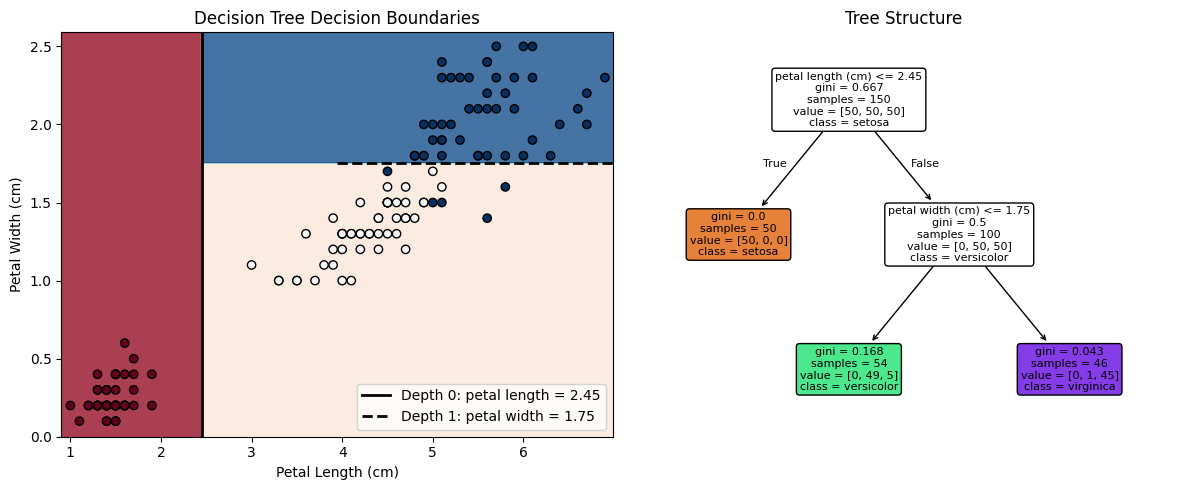

In [8]:
# Membuat decision boundaries
def plot_decision_boundaries(tree_clf, X, y, iris):
    plt.figure(figsize=(12, 5))
    
    # Subplot 1: Decision boundaries
    plt.subplot(1, 2, 1)
    
    # Membuat grid untuk plotting
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Prediksi untuk setiap titik di grid
    Z = tree_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundaries
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    
    # Plot data points
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu, edgecolors='black')
    plt.xlabel('Petal Length (cm)')
    plt.ylabel('Petal Width (cm)')
    plt.title('Decision Tree Decision Boundaries')
    
    # Tambahkan garis decision boundaries
    plt.axvline(x=2.45, color='black', linestyle='-', linewidth=2, label='Depth 0: petal length = 2.45')
    plt.axhline(y=1.75, xmin=0.5, color='black', linestyle='--', linewidth=2, label='Depth 1: petal width = 1.75')
    plt.legend()
    
    # Subplot 2: Tree structure
    plt.subplot(1, 2, 2)
    plot_tree(tree_clf, 
              feature_names=iris.feature_names[2:],
              class_names=iris.target_names,
              filled=True,
              rounded=True,
              fontsize=8)
    plt.title('Tree Structure')
    
    plt.tight_layout()
    plt.show()

plot_decision_boundaries(tree_clf, X, y, iris)

## 4. Kompleksitas Komputasi

### Teori: Analisis Kompleksitas

**Kompleksitas Prediksi:**
- Decision Tree umumnya seimbang (balanced)
- Kedalaman rata-rata ≈ O(log₂(m))
- Kompleksitas prediksi: **O(log₂(m))**
- Tidak bergantung pada jumlah fitur!

**Kompleksitas Training:**
- Membandingkan semua fitur pada semua sampel di setiap node
- Kompleksitas: **O(n × m × log₂(m))**
- n = jumlah fitur, m = jumlah sampel

### Eksperimen Kompleksitas

Samples:   100 | Train: 0.0033s | Predict: 0.0003s
Samples:   500 | Train: 0.0103s | Predict: 0.0003s
Samples:  1000 | Train: 0.0223s | Predict: 0.0004s
Samples:  5000 | Train: 0.1491s | Predict: 0.0010s
Samples: 10000 | Train: 0.3604s | Predict: 0.0017s


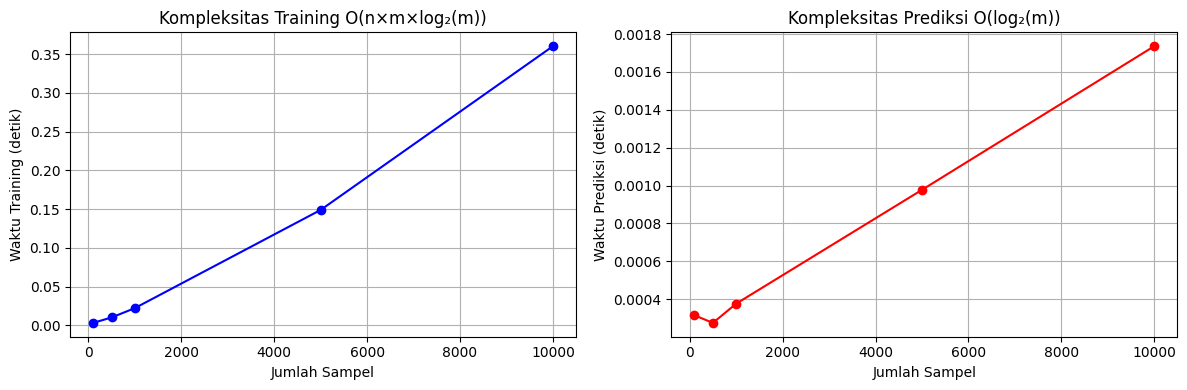

In [9]:
import time
from sklearn.datasets import make_classification

# Fungsi untuk mengukur waktu training dan prediksi
def measure_complexity():
    results = {'samples': [], 'train_time': [], 'predict_time': []}
    
    # Test dengan berbagai ukuran dataset
    sample_sizes = [100, 500, 1000, 5000, 10000]
    
    for n_samples in sample_sizes:
        # Generate dataset
        X, y = make_classification(n_samples=n_samples, n_features=20, 
                                 n_informative=10, n_redundant=10,
                                 random_state=42)
        
        # Ukur waktu training
        tree = DecisionTreeClassifier(random_state=42)
        start_time = time.time()
        tree.fit(X, y)
        train_time = time.time() - start_time
        
        # Ukur waktu prediksi
        start_time = time.time()
        _ = tree.predict(X)
        predict_time = time.time() - start_time
        
        results['samples'].append(n_samples)
        results['train_time'].append(train_time)
        results['predict_time'].append(predict_time)
        
        print(f"Samples: {n_samples:5d} | Train: {train_time:.4f}s | Predict: {predict_time:.4f}s")
    
    return results

# Jalankan eksperimen
complexity_results = measure_complexity()

# Plot hasil
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(complexity_results['samples'], complexity_results['train_time'], 'bo-')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Waktu Training (detik)')
plt.title('Kompleksitas Training O(n×m×log₂(m))')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(complexity_results['samples'], complexity_results['predict_time'], 'ro-')
plt.xlabel('Jumlah Sampel')
plt.ylabel('Waktu Prediksi (detik)')
plt.title('Kompleksitas Prediksi O(log₂(m))')
plt.grid(True)

plt.tight_layout()
plt.show()

## 5. Gini Impurity vs Entropy

### Teori: Dua Metrik Impurity

**Gini Impurity:**
```
Gini = 1 - Σ(p_i,k)²
```
- Mengukur probabilitas salah klasifikasi jika label dipilih random
- Nilai 0 = node pure, nilai tinggi = node impure
- Lebih cepat dihitung

**Entropy:**
```
Entropy = -Σ(p_i,k × log₂(p_i,k))
```
- Berasal dari information theory
- Mengukur rata-rata informasi dalam pesan
- Cenderung menghasilkan tree yang lebih balanced

### Implementasi dan Perbandingan

In [10]:
# Fungsi untuk menghitung entropy
def entropy(y):
    """Menghitung entropy untuk array label y"""
    if len(y) == 0:
        return 0
    
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    
    # Hindari log(0) dengan menambahkan epsilon kecil
    probabilities = probabilities[probabilities > 0]
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Perbandingan Gini vs Entropy pada berbagai distribusi kelas
distributions = [
    [100],           # Pure node (semua kelas sama)
    [50, 50],        # Balanced 2 kelas
    [25, 25, 25, 25], # Balanced 4 kelas
    [90, 10],        # Imbalanced 2 kelas
    [70, 20, 10],    # Imbalanced 3 kelas
]

print("Perbandingan Gini Impurity vs Entropy:")
print("=" * 50)
print(f"{'Distribusi':<20} {'Gini':<10} {'Entropy':<10}")
print("-" * 50)

for dist in distributions:
    # Buat array label berdasarkan distribusi
    y_sample = []
    for i, count in enumerate(dist):
        y_sample.extend([i] * count)
    y_sample = np.array(y_sample)
    
    gini = gini_impurity(y_sample)
    ent = entropy(y_sample)
    
    print(f"{str(dist):<20} {gini:<10.3f} {ent:<10.3f}")

Perbandingan Gini Impurity vs Entropy:
Distribusi           Gini       Entropy   
--------------------------------------------------
[100]                0.000      -0.000    
[50, 50]             0.500      1.000     
[25, 25, 25, 25]     0.750      2.000     
[90, 10]             0.180      0.469     
[70, 20, 10]         0.460      1.157     


### Eksperimen: Perbedaan Tree dengan Gini vs Entropy

Perbandingan Performa:
Gini - Akurasi rata-rata: 0.960 (±0.050)
Entropy - Akurasi rata-rata: 0.960 (±0.050)


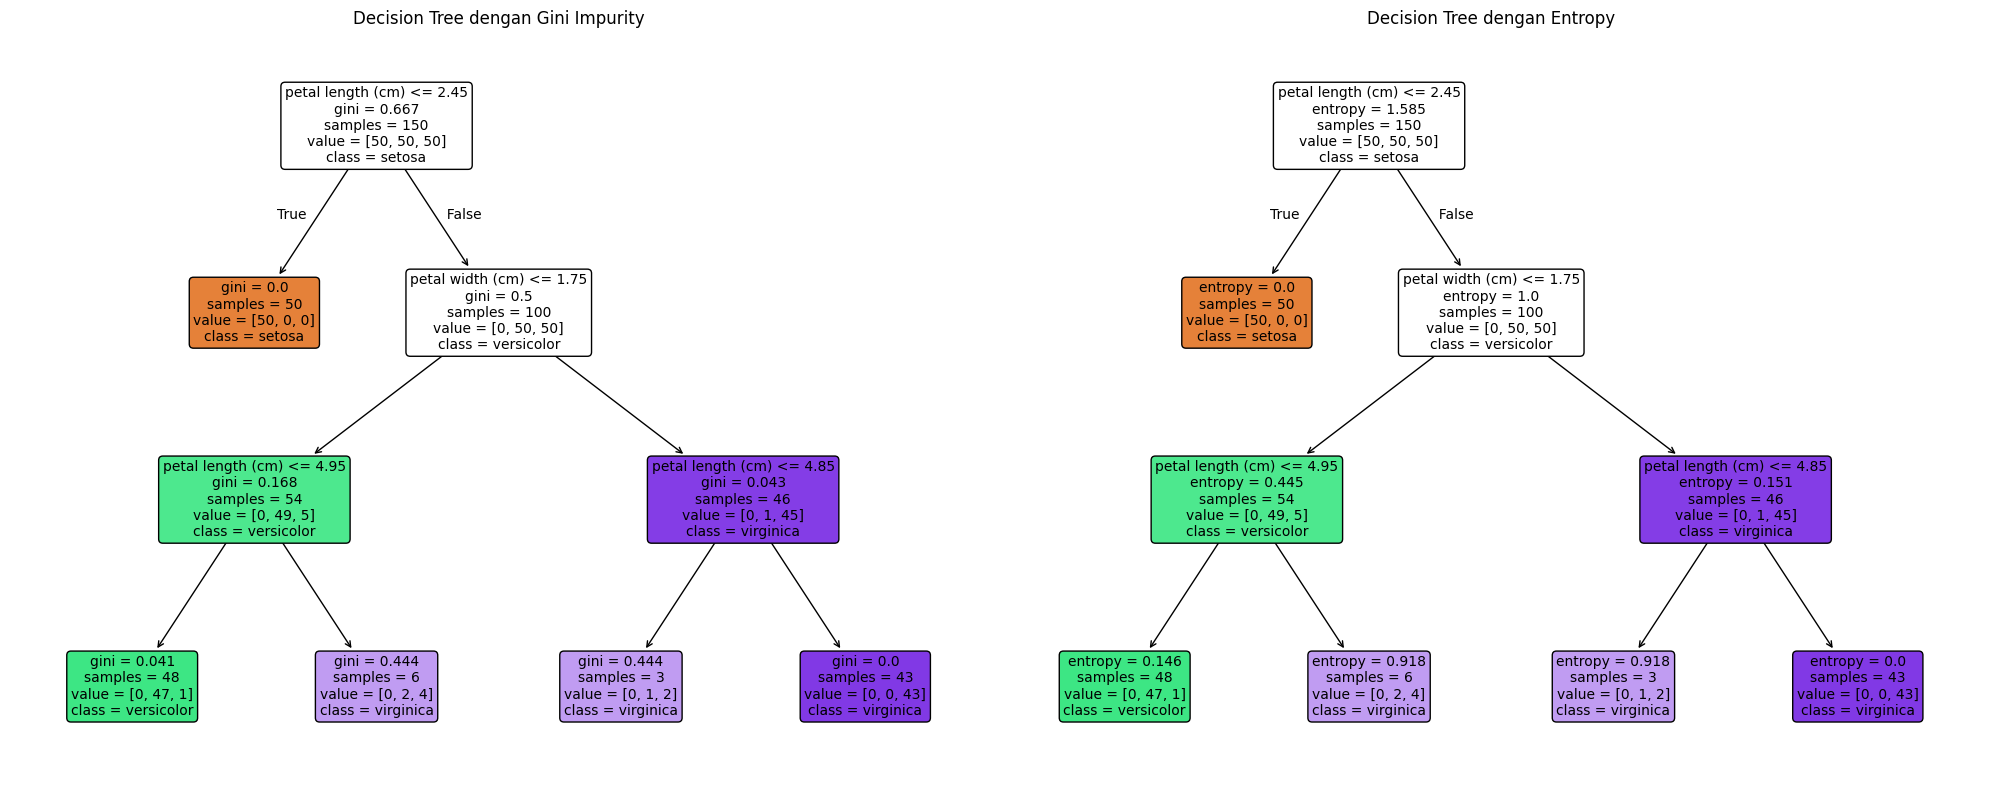

In [11]:
# Bandingkan tree yang dihasilkan dengan Gini vs Entropy
from sklearn.model_selection import cross_val_score

# Tree dengan Gini impurity
tree_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_gini.fit(X, y)

# Tree dengan Entropy
tree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
tree_entropy.fit(X, y)

# Evaluasi performa dengan cross-validation
scores_gini = cross_val_score(tree_gini, X, y, cv=5)
scores_entropy = cross_val_score(tree_entropy, X, y, cv=5)

print("Perbandingan Performa:")
print(f"Gini - Akurasi rata-rata: {scores_gini.mean():.3f} (±{scores_gini.std()*2:.3f})")
print(f"Entropy - Akurasi rata-rata: {scores_entropy.mean():.3f} (±{scores_entropy.std()*2:.3f})")

# Visualisasi kedua tree
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Tree dengan Gini
plot_tree(tree_gini, 
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          filled=True, rounded=True, fontsize=10, ax=ax1)
ax1.set_title("Decision Tree dengan Gini Impurity")

# Tree dengan Entropy
plot_tree(tree_entropy, 
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          filled=True, rounded=True, fontsize=10, ax=ax2)
ax2.set_title("Decision Tree dengan Entropy")

plt.tight_layout()
plt.show()

## 6. Hyperparameter Regularisasi

### Teori: Mencegah Overfitting

Decision Tree tanpa batasan akan terus membagi data hingga setiap leaf node hanya berisi satu sampel (atau semua sampel memiliki kelas yang sama). Ini menyebabkan **overfitting** yang parah.

**Hyperparameter Regularisasi utama:**

1. **max_depth**: Kedalaman maksimum tree
2. **min_samples_split**: Minimum sampel untuk melakukan split
3. **min_samples_leaf**: Minimum sampel di setiap leaf node
4. **max_leaf_nodes**: Maksimum jumlah leaf nodes
5. **min_weight_fraction_leaf**: Minimum fraksi weight di leaf node
6. **max_features**: Maksimum fitur yang dievaluasi untuk split

### Implementasi: Eksperimen Regularisasi

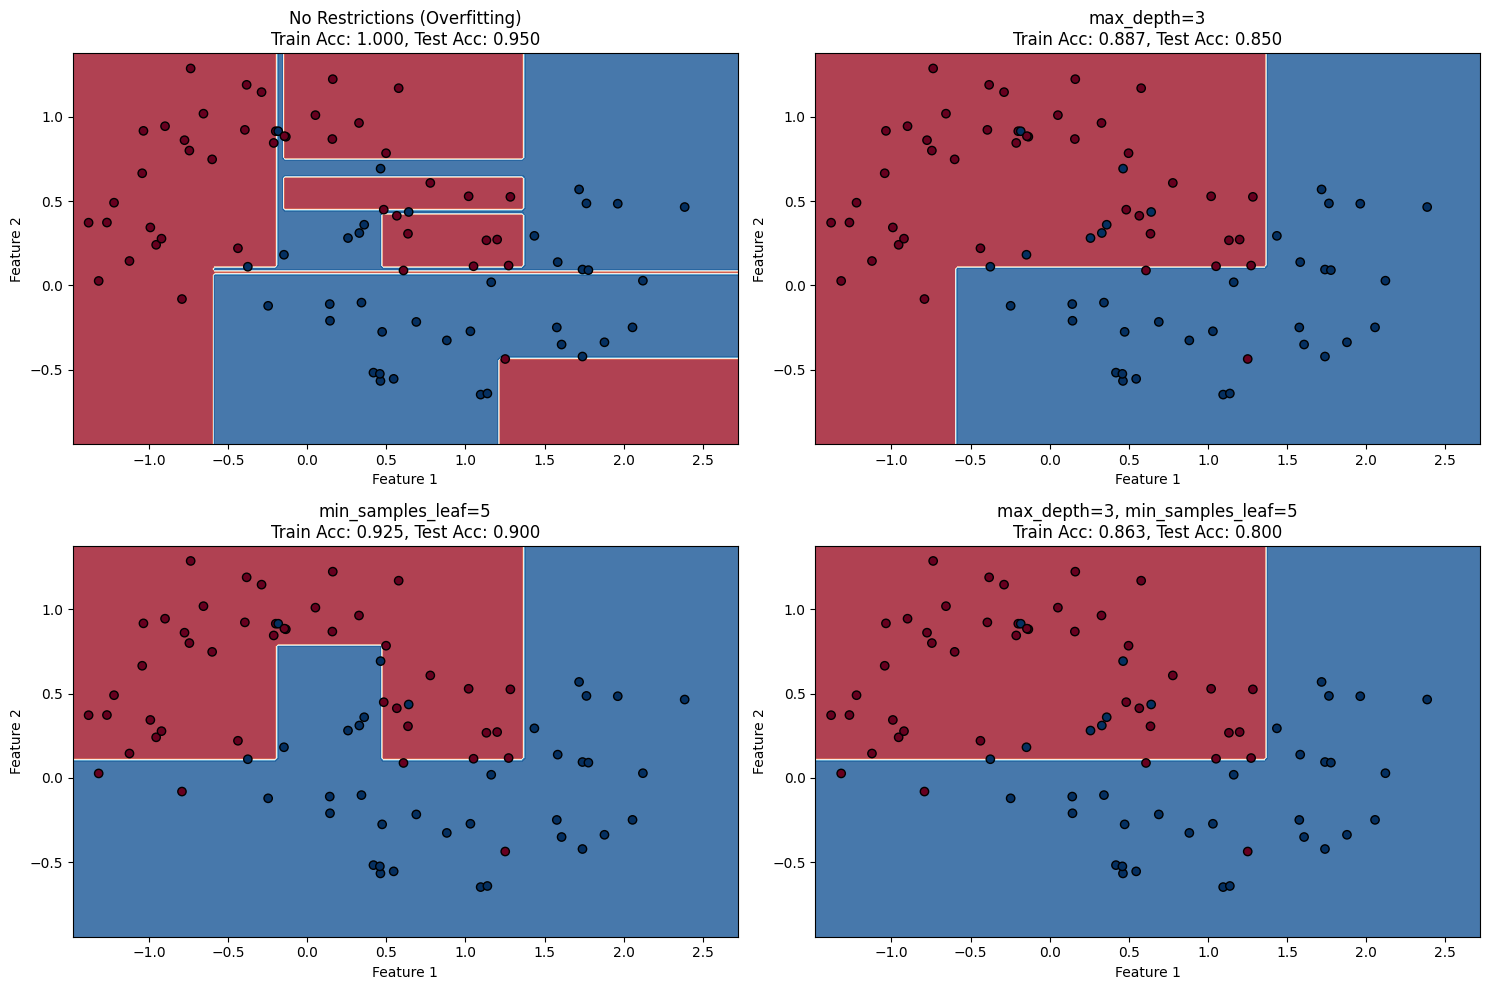

In [12]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

# Generate dataset moons yang lebih kompleks
X_moons, y_moons = make_moons(n_samples=100, noise=0.25, random_state=53)
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

# Fungsi untuk plot decision boundaries
def plot_decision_boundary_comparison():
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Konfigurasi yang berbeda
    configs = [
        {'max_depth': None, 'min_samples_leaf': 1, 'title': 'No Restrictions (Overfitting)'},
        {'max_depth': 3, 'min_samples_leaf': 1, 'title': 'max_depth=3'},
        {'max_depth': None, 'min_samples_leaf': 5, 'title': 'min_samples_leaf=5'},
        {'max_depth': 3, 'min_samples_leaf': 5, 'title': 'max_depth=3, min_samples_leaf=5'}
    ]
    
    for idx, config in enumerate(configs):
        ax = axes[idx//2, idx%2]
        
        # Train model
        tree = DecisionTreeClassifier(
            max_depth=config['max_depth'],
            min_samples_leaf=config['min_samples_leaf'],
            random_state=42
        )
        tree.fit(X_train, y_train)
        
        # Buat grid untuk decision boundary
        x_min, x_max = X_moons[:, 0].min() - 0.1, X_moons[:, 0].max() + 0.1
        y_min, y_max = X_moons[:, 1].min() - 0.1, X_moons[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                           np.arange(y_min, y_max, 0.02))
        
        # Prediksi untuk grid
        Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        
        # Plot
        ax.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='black')
        ax.set_title(f"{config['title']}\nTrain Acc: {tree.score(X_train, y_train):.3f}, Test Acc: {tree.score(X_test, y_test):.3f}")
        ax.set_xlabel('Feature 1')
        ax.set_ylabel('Feature 2')
    
    plt.tight_layout()
    plt.show()

plot_decision_boundary_comparison()

### Grid Search untuk Optimal Hyperparameters

In [13]:
from sklearn.model_selection import GridSearchCV

# Parameter grid untuk grid search
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_leaf_nodes': [None, 10, 20, 50]
}

# Grid search dengan cross-validation
tree_clf = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree_clf, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

print("Best parameters:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest cross-validation score: {grid_search.best_score_:.3f}")
print(f"Test score with best params: {grid_search.best_estimator_.score(X_test, y_test):.3f}")

# Analisis feature importance
best_tree = grid_search.best_estimator_
feature_importance = best_tree.feature_importances_
print(f"\nFeature Importance:")
for i, importance in enumerate(feature_importance):
    print(f"  Feature {i}: {importance:.3f}")

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
Best parameters:
  max_depth: 7
  max_leaf_nodes: 10
  min_samples_leaf: 2
  min_samples_split: 2

Best cross-validation score: 0.850
Test score with best params: 0.950

Feature Importance:
  Feature 0: 0.472
  Feature 1: 0.528


## 7. Regresi dengan Decision Trees

### Teori: Decision Tree untuk Regresi

Untuk tugas regresi, Decision Tree bekerja sedikit berbeda:

1. **Target**: Nilai kontinu (bukan kategori)
2. **Prediksi**: Rata-rata nilai target di leaf node
3. **Splitting Criterion**: Meminimalkan Mean Squared Error (MSE)
4. **Cost Function**:
   ```
   MSE = (1/m) × Σ(y_actual - y_predicted)²
   ```

### Implementasi: Decision Tree Regressor

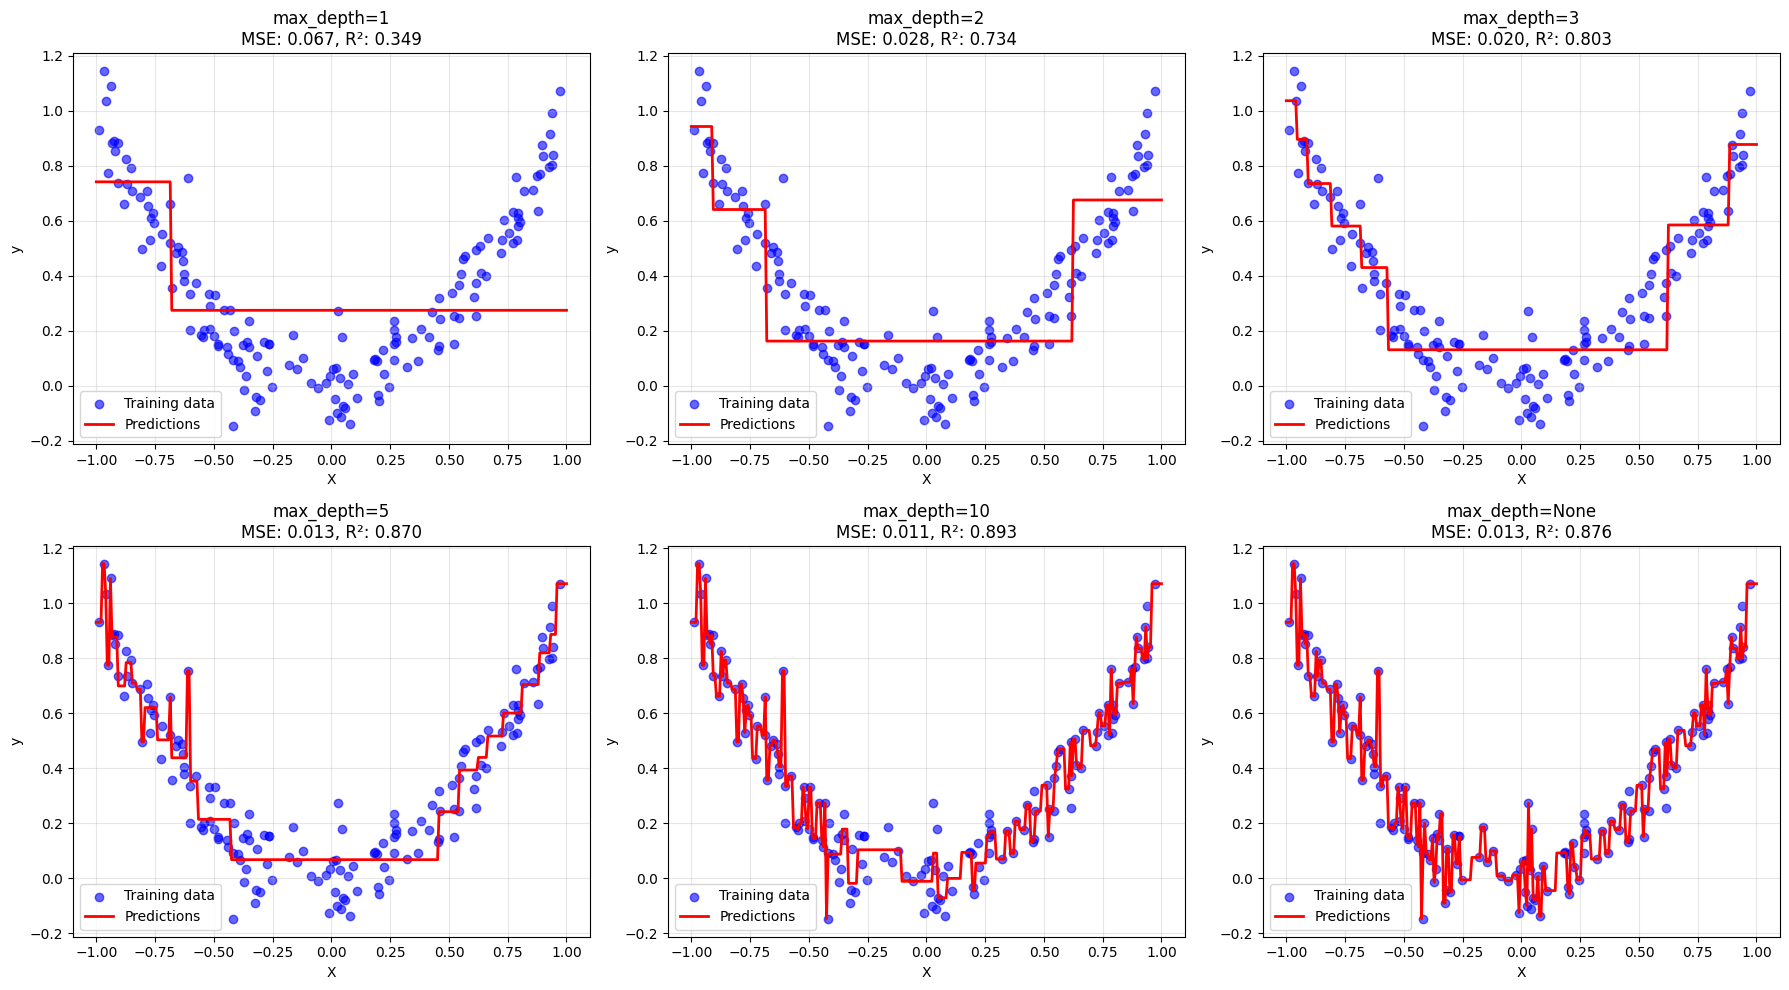

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, r2_score

# Generate dataset regresi
np.random.seed(42)
X_reg = np.random.rand(200, 1) * 2 - 1  # nilai antara -1 dan 1
y_reg = X_reg.ravel()**2 + 0.1 * np.random.randn(200)  # fungsi kuadrat + noise

# Split data
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# Train decision tree regressor dengan berbagai kedalaman
depths = [1, 2, 3, 5, 10, None]
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for idx, depth in enumerate(depths):
    ax = axes[idx//3, idx%3]
    
    # Train model
    tree_reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    tree_reg.fit(X_train_reg, y_train_reg)
    
    # Prediksi untuk plotting
    X_plot = np.linspace(-1, 1, 300).reshape(-1, 1)
    y_pred_plot = tree_reg.predict(X_plot)
    
    # Plot
    ax.scatter(X_train_reg, y_train_reg, alpha=0.6, color='blue', label='Training data')
    ax.plot(X_plot, y_pred_plot, color='red', linewidth=2, label='Predictions')
    
    # Evaluasi
    y_pred_test = tree_reg.predict(X_test_reg)
    mse = mean_squared_error(y_test_reg, y_pred_test)
    r2 = r2_score(y_test_reg, y_pred_test)
    
    ax.set_title(f'max_depth={depth}\nMSE: {mse:.3f}, R²: {r2:.3f}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analisis Overfitting pada Regresi

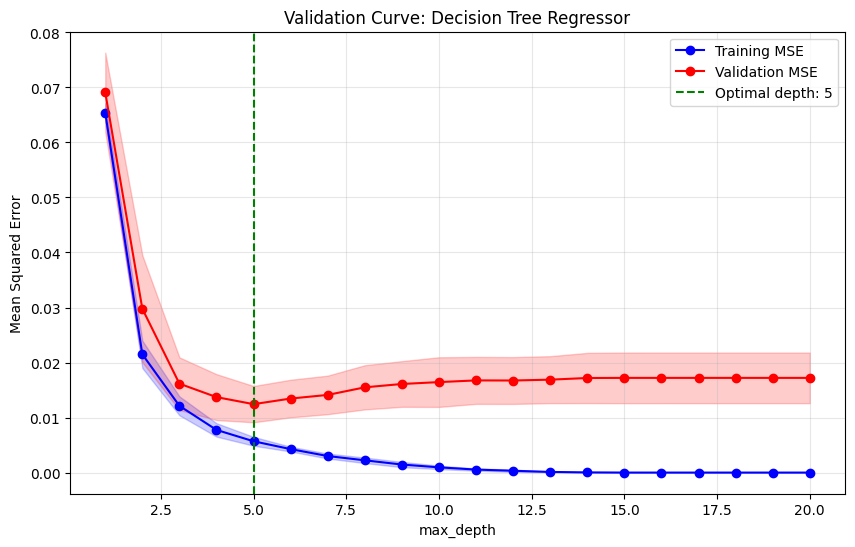

Optimal max_depth: 5
Minimum validation MSE: 0.0124


In [15]:
# Analisis learning curve untuk melihat overfitting
from sklearn.model_selection import validation_curve

# Parameter range untuk analisis
param_range = range(1, 21)
train_scores, val_scores = validation_curve(
    DecisionTreeRegressor(random_state=42), X_reg, y_reg,
    param_name='max_depth', param_range=param_range,
    cv=5, scoring='neg_mean_squared_error'
)

# Konversi ke positive MSE
train_mse = -train_scores.mean(axis=1)
train_mse_std = train_scores.std(axis=1)
val_mse = -val_scores.mean(axis=1)
val_mse_std = val_scores.std(axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(param_range, train_mse, 'o-', color='blue', label='Training MSE')
plt.fill_between(param_range, train_mse - train_mse_std, 
                 train_mse + train_mse_std, alpha=0.2, color='blue')

plt.plot(param_range, val_mse, 'o-', color='red', label='Validation MSE')
plt.fill_between(param_range, val_mse - val_mse_std, 
                 val_mse + val_mse_std, alpha=0.2, color='red')

plt.xlabel('max_depth')
plt.ylabel('Mean Squared Error')
plt.title('Validation Curve: Decision Tree Regressor')
plt.legend()
plt.grid(True, alpha=0.3)

# Tambahkan garis vertikal untuk optimal depth
optimal_depth = param_range[np.argmin(val_mse)]
plt.axvline(x=optimal_depth, color='green', linestyle='--', 
            label=f'Optimal depth: {optimal_depth}')
plt.legend()
plt.show()

print(f"Optimal max_depth: {optimal_depth}")
print(f"Minimum validation MSE: {val_mse.min():.4f}")

## 8. Instabilitas Decision Trees

### Teori: Masalah Instabilitas

Decision Trees memiliki masalah **instabilitas** yang signifikan:

1. **Sensitif terhadap perubahan data**: Perubahan kecil pada training data dapat menghasilkan tree yang sangat berbeda
2. **Sensitif terhadap rotasi**: Decision boundaries selalu orthogonal (tegak lurus sumbu)
3. **High variance**: Model dapat sangat berbeda antar training session

### Demonstrasi Instabilitas

Menghapus sample index 70: [4.8 1.8] (kelas: versicolor)


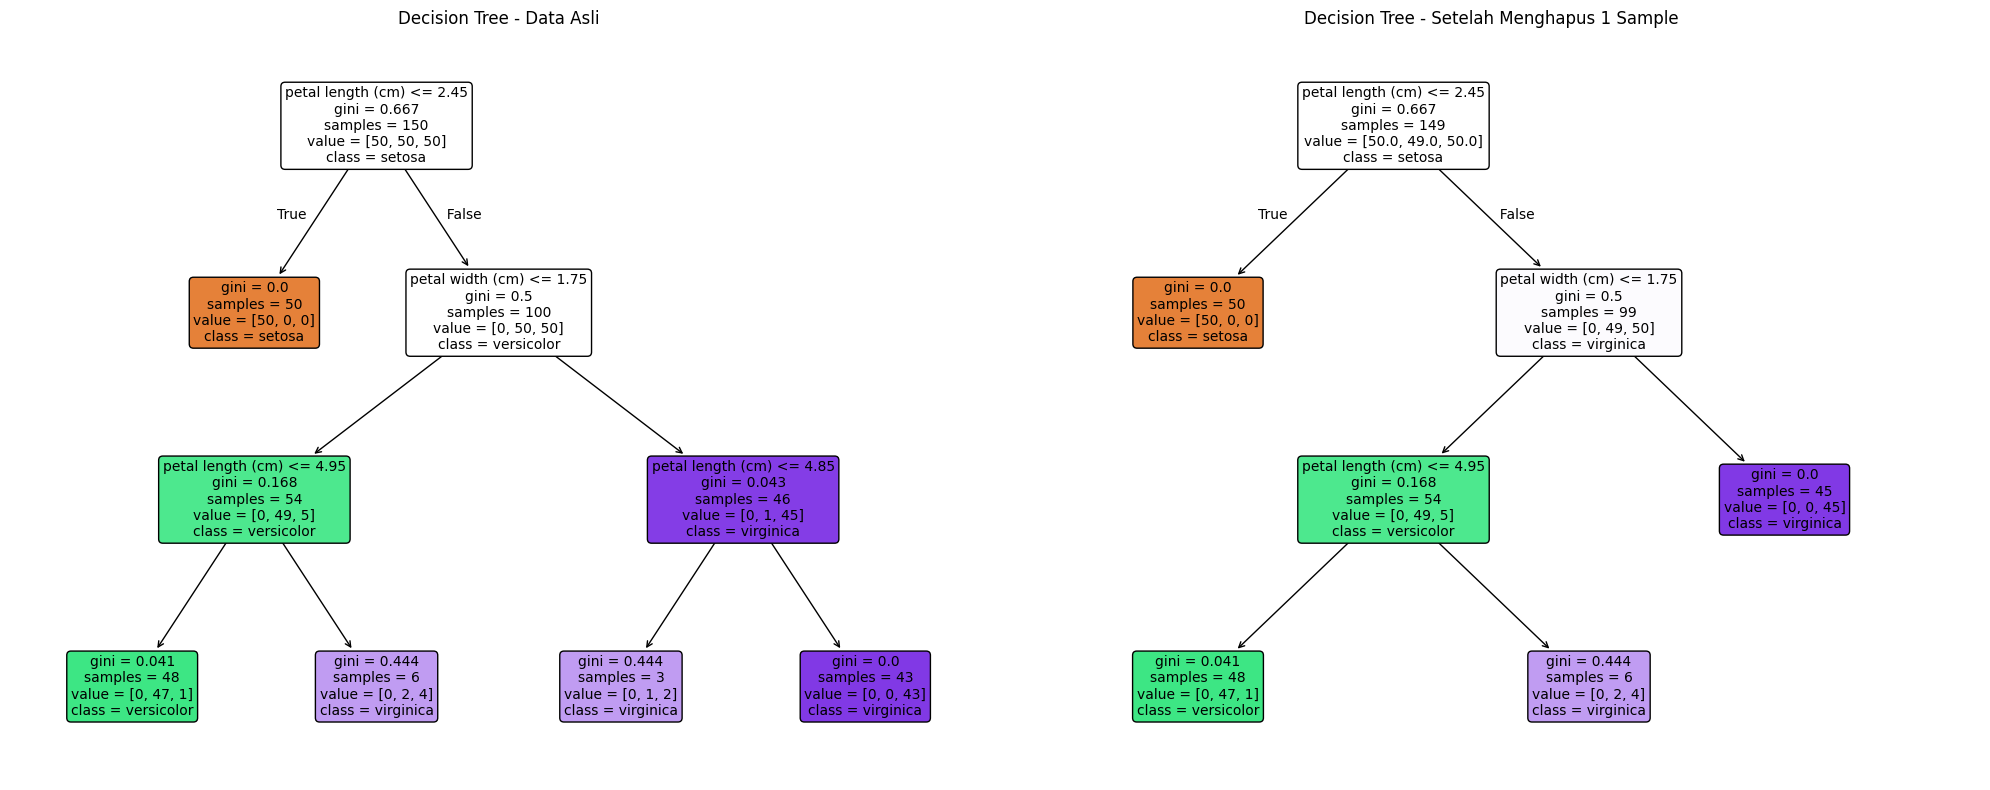


Perbandingan Prediksi:
Test Case       Original        Modified        Same?
------------------------------------------------------------
[1.5 0.5]       setosa          setosa          ✓
[3. 1.]         versicolor      versicolor      ✓
[5.  1.8]       virginica       virginica       ✓
[6.  2.5]       virginica       virginica       ✓


In [16]:
# Demonstrasi instabilitas dengan mengubah satu data point
from sklearn.datasets import load_iris

# Load data iris lengkap
iris_full = load_iris()
X_full = iris_full.data[:, 2:]
y_full = iris_full.target

# Tree dengan data lengkap
tree_original = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_original.fit(X_full, y_full)

# Hapus satu data point (sample terluas dari versicolor)
# Cari index sample dengan petal length terbesar dan petal width terbesar di kelas versicolor
versicolor_indices = np.where(y_full == 1)[0]
versicolor_X = X_full[versicolor_indices]
max_area_idx = np.argmax(versicolor_X[:, 0] * versicolor_X[:, 1])
remove_idx = versicolor_indices[max_area_idx]

print(f"Menghapus sample index {remove_idx}: {X_full[remove_idx]} (kelas: {iris_full.target_names[y_full[remove_idx]]})")

# Buat dataset baru tanpa sample tersebut
X_modified = np.delete(X_full, remove_idx, axis=0)
y_modified = np.delete(y_full, remove_idx, axis=0)

# Tree dengan data yang dimodifikasi
tree_modified = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_modified.fit(X_modified, y_modified)

# Visualisasi perbandingan
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Tree original
plot_tree(tree_original, 
          feature_names=iris_full.feature_names[2:],
          class_names=iris_full.target_names,
          filled=True, rounded=True, fontsize=10, ax=ax1)
ax1.set_title("Decision Tree - Data Asli")

# Tree modified
plot_tree(tree_modified, 
          feature_names=iris_full.feature_names[2:],
          class_names=iris_full.target_names,
          filled=True, rounded=True, fontsize=10, ax=ax2)
ax2.set_title("Decision Tree - Setelah Menghapus 1 Sample")

plt.tight_layout()
plt.show()

# Bandingkan prediksi pada test cases
test_cases = np.array([[1.5, 0.5], [3.0, 1.0], [5.0, 1.8], [6.0, 2.5]])
print("\nPerbandingan Prediksi:")
print(f"{'Test Case':<15} {'Original':<15} {'Modified':<15} {'Same?'}")
print("-" * 60)

for i, test_case in enumerate(test_cases):
    pred_orig = tree_original.predict([test_case])[0]
    pred_mod = tree_modified.predict([test_case])[0]
    same = pred_orig == pred_mod
    
    print(f"{str(test_case):<15} {iris_full.target_names[pred_orig]:<15} {iris_full.target_names[pred_mod]:<15} {'✓' if same else '✗'}")

### Eksperimen: Random State Effect

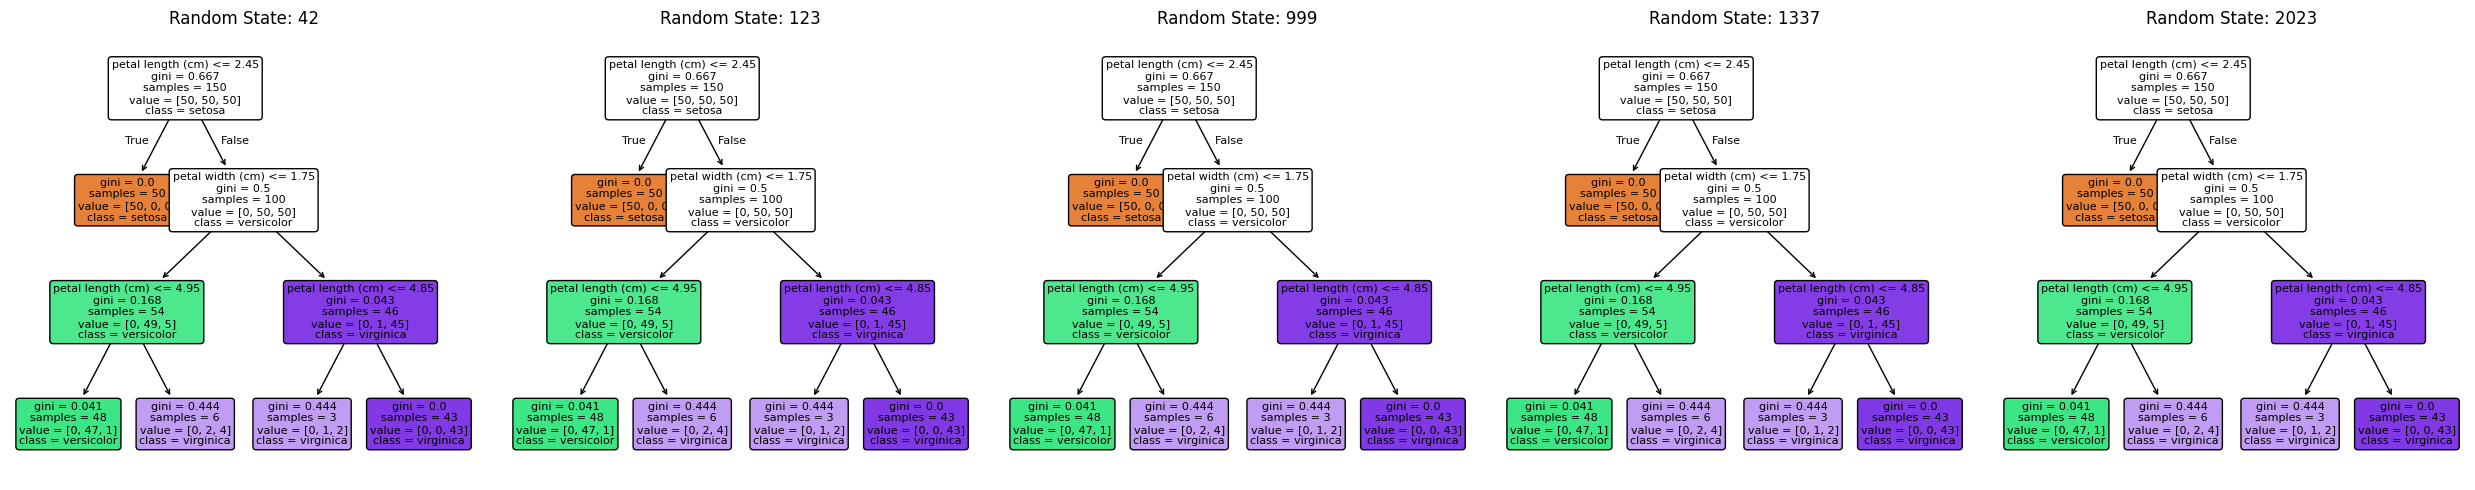

Perbandingan Struktur Decision Trees:
Random State   42: versicolor
Random State  123: versicolor
Random State  999: versicolor
Random State 1337: versicolor
Random State 2023: versicolor

Jumlah prediksi berbeda: 1/5
✓ Semua model memberikan prediksi yang sama


In [17]:
# Demonstrasi efek random state pada hasil yang berbeda
def compare_random_states():
    random_states = [42, 123, 999, 1337, 2023]
    trees = []
    
    fig, axes = plt.subplots(1, len(random_states), figsize=(25, 5))
    
    for i, rs in enumerate(random_states):
        # Train tree dengan random state berbeda
        tree = DecisionTreeClassifier(max_depth=3, random_state=rs)
        tree.fit(X_full, y_full)
        trees.append(tree)
        
        # Plot tree
        plot_tree(tree, 
                  feature_names=iris_full.feature_names[2:],
                  class_names=iris_full.target_names,
                  filled=True, rounded=True, fontsize=8, ax=axes[i])
        axes[i].set_title(f"Random State: {rs}")
    
    plt.tight_layout()
    plt.show()
    
    # Bandingkan struktur trees
    print("Perbandingan Struktur Decision Trees:")
    print("=" * 50)
    
    test_sample = [[4.0, 1.2]]
    predictions = []
    
    for i, (tree, rs) in enumerate(zip(trees, random_states)):
        pred = tree.predict(test_sample)[0]
        predictions.append(pred)
        print(f"Random State {rs:4d}: {iris_full.target_names[pred]}")
    
    # Hitung agreement
    unique_preds = len(set(predictions))
    print(f"\nJumlah prediksi berbeda: {unique_preds}/5")
    if unique_preds == 1:
        print("✓ Semua model memberikan prediksi yang sama")
    else:
        print("✗ Model memberikan prediksi yang berbeda")

compare_random_states()

### Solusi untuk Instabilitas

In [18]:
# Demonstrasi Random Forest sebagai solusi instabilitas
from sklearn.ensemble import RandomForestClassifier

print("Solusi Instabilitas: Random Forest")
print("=" * 40)

# Single Decision Tree
single_tree = DecisionTreeClassifier(random_state=42)
single_tree.fit(X_full, y_full)

# Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_full, y_full)

# Test pada beberapa kasus
test_cases = np.array([[2.0, 0.8], [4.5, 1.4], [6.2, 2.1]])

print(f"{'Test Case':<15} {'Single Tree':<15} {'Random Forest':<15}")
print("-" * 50)

for test_case in test_cases:
    pred_tree = single_tree.predict([test_case])[0]
    pred_forest = random_forest.predict([test_case])[0]
    
    print(f"{str(test_case):<15} {iris_full.target_names[pred_tree]:<15} {iris_full.target_names[pred_forest]:<15}")

# Evaluasi stabilitas dengan bootstrap sampling
from sklearn.utils import resample

n_iterations = 50
tree_predictions = []
forest_predictions = []

print(f"\nUji Stabilitas dengan {n_iterations} Bootstrap Samples:")

for i in range(n_iterations):
    # Bootstrap sampling
    X_boot, y_boot = resample(X_full, y_full, random_state=i)
    
    # Train models
    tree_boot = DecisionTreeClassifier(random_state=42)
    forest_boot = RandomForestClassifier(n_estimators=10, random_state=42)
    
    tree_boot.fit(X_boot, y_boot)
    forest_boot.fit(X_boot, y_boot)
    
    # Prediksi pada test case
    test_case = [[4.0, 1.5]]
    tree_pred = tree_boot.predict(test_case)[0]
    forest_pred = forest_boot.predict(test_case)[0]
    
    tree_predictions.append(tree_pred)
    forest_predictions.append(forest_pred)

# Analisis variabilitas
tree_unique = len(set(tree_predictions))
forest_unique = len(set(forest_predictions))

print(f"Single Tree - Jumlah prediksi berbeda: {tree_unique}")
print(f"Random Forest - Jumlah prediksi berbeda: {forest_unique}")
print(f"Random Forest {forest_unique/tree_unique*100:.1f}% lebih stabil")

Solusi Instabilitas: Random Forest
Test Case       Single Tree     Random Forest  
--------------------------------------------------
[2.  0.8]       setosa          setosa         
[4.5 1.4]       versicolor      versicolor     
[6.2 2.1]       virginica       virginica      

Uji Stabilitas dengan 50 Bootstrap Samples:
Single Tree - Jumlah prediksi berbeda: 1
Random Forest - Jumlah prediksi berbeda: 1
Random Forest 100.0% lebih stabil


## 9. Kesimpulan dan Best Practices

### Kelebihan Decision Trees:
1. **Interpretable**: Mudah dipahami dan dijelaskan
2. **No preprocessing**: Tidak perlu normalisasi atau scaling
3. **Handle mixed data**: Bisa numeric dan categorical
4. **Feature selection**: Otomatis memilih fitur penting
5. **Non-linear**: Bisa capture pola non-linear
6. **Fast prediction**: O(log n) complexity

### Kekurangan Decision Trees:
1. **Overfitting**: Mudah overfit tanpa regularisasi
2. **Instability**: Sensitif terhadap perubahan data
3. **Bias**: Bias terhadap fitur dengan banyak level
4. **Linear relationships**: Sulit capture hubungan linear
5. **Orthogonal boundaries**: Hanya split tegak lurus

### Best Practices:

In [19]:
# Template untuk penggunaan Decision Tree yang baik
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

def optimal_decision_tree(X, y, task_type='classification'):
    """
    Fungsi untuk membuat Decision Tree yang optimal
    """
    
    if task_type == 'classification':
        base_model = DecisionTreeClassifier(random_state=42)
        param_grid = {
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'criterion': ['gini', 'entropy']
        }
    else:
        from sklearn.tree import DecisionTreeRegressor
        base_model = DecisionTreeRegressor(random_state=42)
        param_grid = {
            'max_depth': [3, 5, 7, 10, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 5],
            'criterion': ['mse', 'mae']
        }
    
    # Grid search dengan cross-validation
    grid_search = GridSearchCV(
        base_model, param_grid, 
        cv=5, scoring='accuracy' if task_type=='classification' else 'neg_mean_squared_error',
        n_jobs=-1
    )
    
    grid_search.fit(X, y)
    
    print("Optimal Parameters:")
    for param, value in grid_search.best_params_.items():
        print(f"  {param}: {value}")
    
    print(f"Best CV Score: {grid_search.best_score_:.3f}")
    
    return grid_search.best_estimator_

# Contoh penggunaan
print("Mencari Decision Tree Optimal untuk Dataset Iris:")
optimal_tree = optimal_decision_tree(X_full, y_full, 'classification')

# Evaluasi final
cv_scores = cross_val_score(optimal_tree, X_full, y_full, cv=5)
print(f"\nFinal Cross-Validation Accuracy: {cv_scores.mean():.3f} (±{cv_scores.std()*2:.3f})")

Mencari Decision Tree Optimal untuk Dataset Iris:
Optimal Parameters:
  criterion: gini
  max_depth: 5
  min_samples_leaf: 1
  min_samples_split: 5
Best CV Score: 0.967

Final Cross-Validation Accuracy: 0.967 (±0.042)


### Kapan Menggunakan Decision Trees:

1. **Gunakan ketika**:
   - Interpretabilitas sangat penting
   - Data mixed (numerical + categorical)
   - Tidak ada waktu untuk preprocessing
   - Pola non-linear
   - Baseline model cepat

2. **Hindari ketika**:
   - Dataset sangat besar
   - Fitur continuous dengan hubungan linear
   - Butuh model yang sangat akurat
   - Data sangat noisy

3. **Alternatif yang lebih baik**:
   - **Random Forest**: Untuk akurasi lebih tinggi dan stabilitas
   - **Gradient Boosting**: Untuk performa maksimal
   - **Linear Models**: Untuk hubungan linear
   - **Neural Networks**: Untuk data kompleks dan besar

---

## Summary Chapter 6

Dalam chapter ini, kita telah mempelajari Decision Trees secara mendalam:

1. **Konsep Dasar**: Decision Trees bekerja dengan membuat pertanyaan binary untuk memisahkan data
2. **Algoritma CART**: Menggunakan greedy algorithm untuk mencari split terbaik berdasarkan impurity reduction
3. **Impurity Measures**: Gini Impurity dan Entropy sebagai metrik untuk mengukur "kebersihan" node
4. **Regularization**: Berbagai hyperparameter untuk mencegah overfitting
5. **Regression**: Decision Trees juga dapat digunakan untuk tugas regresi
6. **Instability**: Masalah utama Decision Trees dan solusinya (Random Forest)

Decision Trees adalah algoritma yang powerful dan mudah dipahami, namun memiliki keterbatasan yang perlu diatasi dengan teknik ensemble seperti Random Forest yang akan dibahas di chapter selanjutnya.

**Key Takeaways:**
- Decision Trees = White box model (interpretable)
- Prone to overfitting → butuh regularization
- Instable → gunakan ensemble methods
- Fast prediction → cocok untuk real-time applications
- No preprocessing needed → good for quick prototyping